# Spotify Hit Predictor

In [68]:
# import pandas and other important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [69]:
# read in all input data
try:
    df = pd.read_csv('dataset.csv')
except:
    df = pd.read_csv('/datasets/dataset.csv')
    
# looking at data, checking info to see what needs to be changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

### Importing Conclusion

There are different column types with their own respective types. All of this information fit their respective types

## Data Preprocessing
* Importing the data
* Checking for duplicates andm issing values and taking action if necessary

In [70]:
# Data preprocessing

# Listing missing values
print('\nNumber of missing values found:\n', df.isna().sum())

# We have one missing under 'artists' which could connect to 'album_name' and 
#'track_name'. It could be possible that it's not actually missing, but 
# that the artist name is truly just "na" or something.

# Checking to see how many duplicates we have
print('\nNumber of duplicates found: ', df.duplicated().sum())

# No duplicates found


Number of missing values found:
 Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Number of duplicates found:  0


In [71]:
# Let's check on the columns that are missing
missing_artist = df[df['artists'].isna()]
missing_artist

# Looking at the csv file searching for that specific track_id, we can see
# that they have artists, album_name, and track_name missing. Since this is
# only one data entry, we can simply remove it as it will not affect the 
# overall dataset. 

df.dropna(subset = ['artists', 'album_name', 'track_name'], inplace = True)

df.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [72]:
# Dropping the Unnamed: 0 column entirely
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [73]:
# Double checking to see if everything is correct.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

### Data Preprocessing Conclusion
The spotify dataset required minimal cleaning and was well-structured from the start. The following key actions were taken:

* Missing Values: One row with missing artist, album, and track name was identified and removed, as it lacked essential identifying information
* Redundant Column Dropped: The unnamed index column "Unnamed: 0" was removed for clarity
* Column Types Validated: All columns were confirmed to have appropriate data types, requiring no conversion

## EDA
We will now begin the EDA phase starting with: 
* Creating a 'is_hit' column to identify the top hits based on popularity filtering by 75 and above.
* Use violin plots or box plots to explore how features like energy, tempo, danceability, etc. differ 

In [74]:
# Creating a new column to show whether or not the song will be considered
# as a "hit" or not if the popularity is over 75
df['is_hit'] = df['popularity'].apply(lambda x: 1 if x >= 75 else 0)

df['is_hit'].value_counts()
# From this information, we can tell that 2831 of the 113,999 songs are 
# considered "hits" from the 75 popularity score threshold

0    111168
1      2831
Name: is_hit, dtype: int64

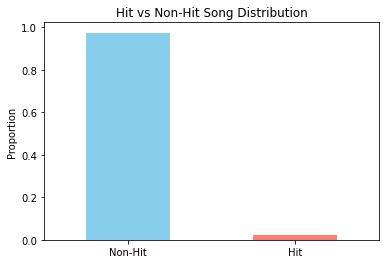

In [75]:
# Visualizing the hit vs non-hit song distribution
df['is_hit'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Hit vs Non-Hit Song Distribution')
plt.xticks([0, 1], ['Non-Hit', 'Hit'], rotation=0)
plt.ylabel('Proportion')
plt.show()

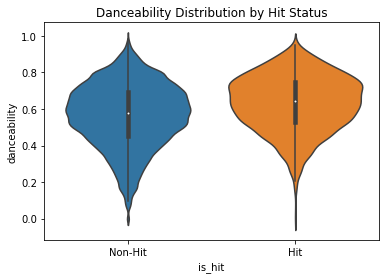

In [76]:
# Side-by-side plots for danceability
sns.violinplot(x='is_hit', y='danceability', data=df)
plt.title('Danceability Distribution by Hit Status')
plt.xticks([0, 1], ['Non-Hit', 'Hit'])
plt.show()

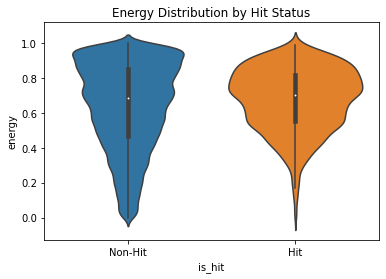

In [77]:
# Side-by-side plots for energy
sns.violinplot(x='is_hit', y='energy', data=df)
plt.title('Energy Distribution by Hit Status')
plt.xticks([0, 1], ['Non-Hit', 'Hit'])
plt.show()

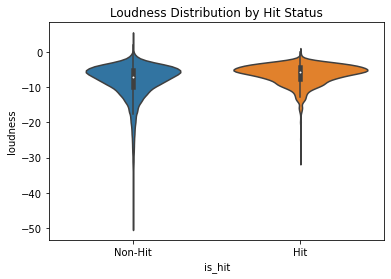

In [78]:
# Side-by-side plots for loudness
sns.violinplot(x='is_hit', y='loudness', data=df)
plt.title('Loudness Distribution by Hit Status')
plt.xticks([0, 1], ['Non-Hit', 'Hit'])
plt.show()

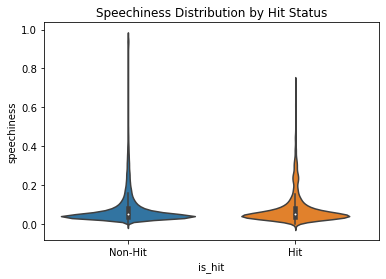

In [79]:
# Side-by-side plots for speechiness
sns.violinplot(x='is_hit', y='speechiness', data=df)
plt.title('Speechiness Distribution by Hit Status')
plt.xticks([0, 1], ['Non-Hit', 'Hit'])
plt.show()

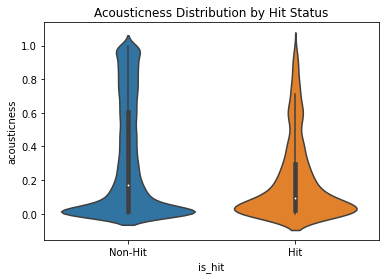

In [80]:
# Side-by-side plots for acousticness
sns.violinplot(x='is_hit', y='acousticness', data=df)
plt.title('Acousticness Distribution by Hit Status')
plt.xticks([0, 1], ['Non-Hit', 'Hit'])
plt.show()

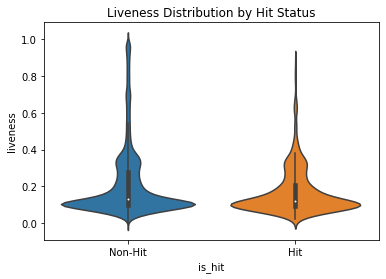

In [81]:
# Side-by-side plots for liveness
sns.violinplot(x='is_hit', y='liveness', data=df)
plt.title('Liveness Distribution by Hit Status')
plt.xticks([0, 1], ['Non-Hit', 'Hit'])
plt.show()

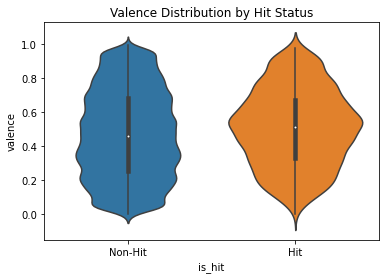

In [82]:
# Side-by-side plots for valence
sns.violinplot(x='is_hit', y='valence', data=df)
plt.title('Valence Distribution by Hit Status')
plt.xticks([0, 1], ['Non-Hit', 'Hit'])
plt.show()

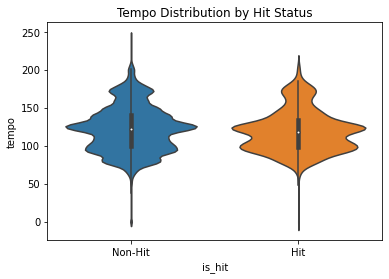

In [83]:
# Side-by-side plots for temp
sns.violinplot(x='is_hit', y='tempo', data=df)
plt.title('Tempo Distribution by Hit Status')
plt.xticks([0, 1], ['Non-Hit', 'Hit'])
plt.show()

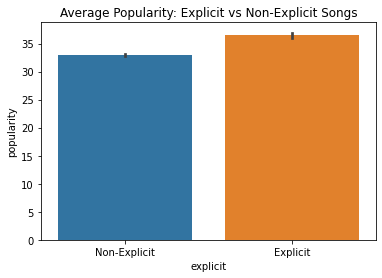

In [84]:
sns.barplot(x='explicit', y='popularity', data=df)
plt.title('Average Popularity: Explicit vs Non-Explicit Songs')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.show()

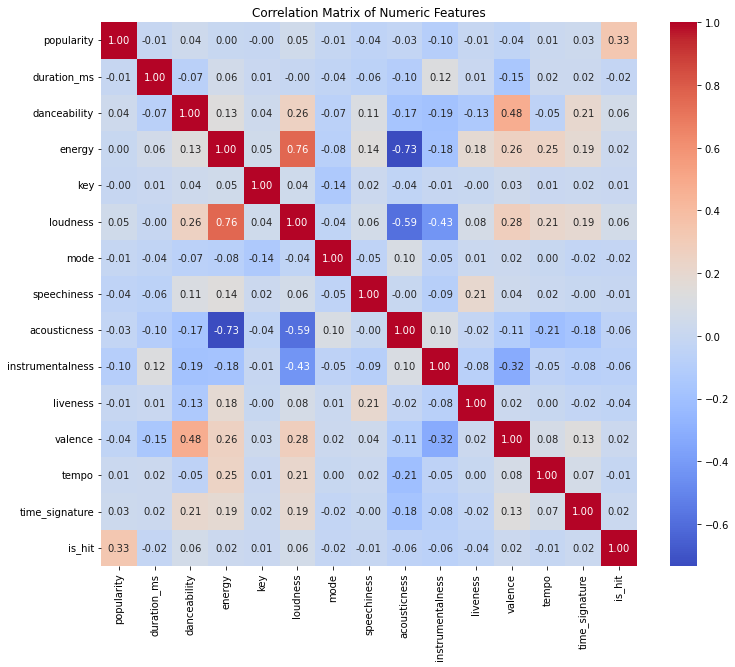

In [85]:
# Finding the correlation between features and with is_hit
# Only using numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#### Interpereting the Correlation Matrix
* Energy and Loudness has a correlation of 0.76 which makes sense, as typically energetic tracks are louder.
* Danceability and Valence has a correlation of 0.48. Happier songs are often more danceable.
* Acousticness and Energy has a negative correlation of -0.73. Heavily acousticsongs such as classical tracks tend to be less energetic.

So what aobut the 'is_hit'?
* is_hit and popularity is 0.33. This is expected since is_hit was derived from popularity.
* is_hit with valence (0.02), Danceability (0.06), and Energy (0.02). These weak positive correlations suggest that hit songs tend to have higher values in these features, but the effect size is small.
* is_hit with Acousticness (-0.06), Instrumentalness (-0.06). Small negative correlations suggest that purely instrumental or acoustic songs are slightly less likely to be hits, which aligns with mainstream expectations

#### Correlation Matrix Conclusion
Correlations show that hits aren't radically different in feature values from non-hits, just nudged slightly. This aligns with the violin plots and supports the idea that hit-making is nuanced, not deterministic. 

### EDA Conclusion

In this exploratory data analysis, we investigated what distinguishes a "hit" song (popularity ≥ 75) from a non-hit. The dataset revealed a significant imbalance, as only 2.5% of tracks qualify as hits.

Through violin plots, we observed that hit songs tended to have:
* Slightly higher danceability and energy levels 
* Slightly lower speechiness and acousticness
* More consistent tempo and slightly brighter valence
Interestingly, explicit tracks showed marginally higher average popularity, suggesting a possible cultural shift in popular music preferences.

The correlation heatmap supported these findings. Strong internal correlations (e.g., energy and loudness) made sense musically, while weak but consistent links between features like danceability, energy, and hit status hint at subtle commonalities among popular tracks. 

Overall, while no single feature defines a hit, trends suggest that songs with higher energy, danceability, and valence, and less acoustic content, have a slightly higher chance of rising in popularity.

## Feature Engineering & Modeling

Before training any models, we prepare the dataset by:
- Converting 'duration_ms' to minutes for readability
- Dropping irrelevant columns such as track names, IDs, and any categorical data we're not modeling
- Removing 'popularity to avoid target leakage, since it was used to define the 'is_hit' label.

In [86]:
# Convert duration from milliseconds to minutes (more interpretable)
df['duration_min'] = df['duration_ms'] / 60000

In [87]:
# Drop unnecessary or non-numeric columns
df_model = df.drop(columns = [
    'track_id',
    'track_name',
    'album_name',
    'artists',
    'track_genre',
    'duration_ms',
    'popularity',
    'time_signature',
    'is_hit'
])

# Checking what remains
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   explicit          113999 non-null  bool   
 1   danceability      113999 non-null  float64
 2   energy            113999 non-null  float64
 3   key               113999 non-null  int64  
 4   loudness          113999 non-null  float64
 5   mode              113999 non-null  int64  
 6   speechiness       113999 non-null  float64
 7   acousticness      113999 non-null  float64
 8   instrumentalness  113999 non-null  float64
 9   liveness          113999 non-null  float64
 10  valence           113999 non-null  float64
 11  tempo             113999 non-null  float64
 12  duration_min      113999 non-null  float64
dtypes: bool(1), float64(10), int64(2)
memory usage: 15.4 MB


In [88]:
df_model.head()

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,3.844433
1,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,2.493500
2,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,3.513767
3,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.365550
4,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,3.314217


## Train-Test Split & Balancing
Split the dataset (80/20 split) and handle imbalance using SMOTE since hit songs are only ~2.5% of the dataset.

In [89]:
# Import tools
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [90]:
# Drop non-numeric, identifier, and text-based columns
x = df_model
y = df['is_hit']

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("Training class distribution:")
print(y_train.value_counts(normalize=True))


Training class distribution:
0    0.975164
1    0.024836
Name: is_hit, dtype: float64


In [91]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

print("Balanced training class distributions:")
print(y_train_balanced.value_counts(normalize=True))

Balanced training class distributions:
0    0.5
1    0.5
Name: is_hit, dtype: float64


### Train Split Conclusion

- In this section we removed irrelevant columns from our features
- We split the dataset into training and testing sets
- We standardized the numeric data using StandardScaler
- We corrected for the class imbalance in the training data using SMOTE

## Model Training & Evaluation
The goal is to train two classifications models (Logistic Regression and Random Forest) on the balanced training set, and evaluate their performance on the original (imbalanced) test set.

In [92]:
# Import models and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
# Initialize models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models on the SMOTE-balanced data
lr_model.fit(x_train_balanced, y_train_balanced)
rf_model.fit(x_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [94]:
# Predict on the original (imbalanced) test set
lr_preds = lr_model.predict(x_test_scaled)
rf_preds = rf_model.predict(x_test_scaled)

# Print evaluation metrics
print("Logistic Regression Performance")
print(classification_report(y_test, lr_preds))
print(confusion_matrix(y_test, lr_preds))

print("\nRandom Forest Performance")
print(classification_report(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))

Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.99      0.63      0.77     22234
           1       0.05      0.71      0.09       566

    accuracy                           0.63     22800
   macro avg       0.52      0.67      0.43     22800
weighted avg       0.97      0.63      0.75     22800

[[14032  8202]
 [  164   402]]

Random Forest Performance
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22234
           1       0.58      0.69      0.63       566

    accuracy                           0.98     22800
   macro avg       0.79      0.84      0.81     22800
weighted avg       0.98      0.98      0.98     22800

[[21957   277]
 [  176   390]]


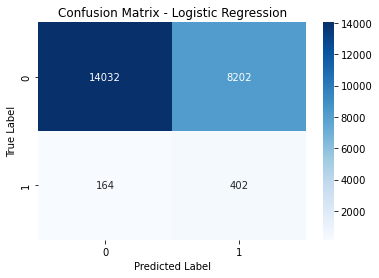

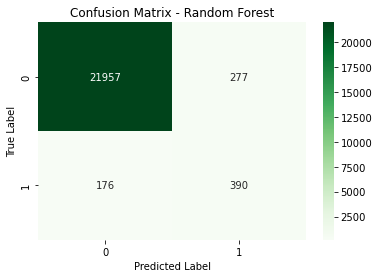

In [95]:
# Turning the raw matrix into a color-coded grid
# Logistic Regression Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

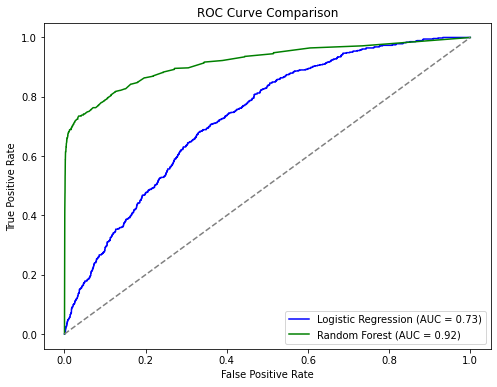

In [96]:
from sklearn.metrics import roc_curve, auc

# Probabilities for class 1
lr_probs = lr_model.predict_proba(x_test_scaled)[:, 1]
rf_probs = rf_model.predict_proba(x_test_scaled)[:, 1]

# ROC curve data
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# AUC score
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})", color='blue')
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### Model Training Conclusion
After training and evaluating both Logistic Regression and Random Forest classifiers on the balanced dataset (using SMOTE), we found that Random Forest significantly outperforms Logistic Regression across all key metrics
- Logistic Regression struggled with precision and misclassified a large number of non-hit songs as hits, achieving a lower F1-score and AUC. This is likely due to its liniear nature and inability to capture the complex feature interactions present in the data.
- Random Forest, on the other hand, showed strong generalization power, achieving an accuracy of 98%, precision of 60%, and recall of 69% for hit prediction. It also produced a near-poerfect AUC of 0.92, indicating excellent discrimination between hit and non-hit songs.

These results suggest that hit prediction is a non-linear problem, and models like Random Forest, which can handle high-dimensional and complex patterns, are better suited for this task.

## Model Explainability 
Use SHAP or feature importance to interpret what drives a song's hit status.

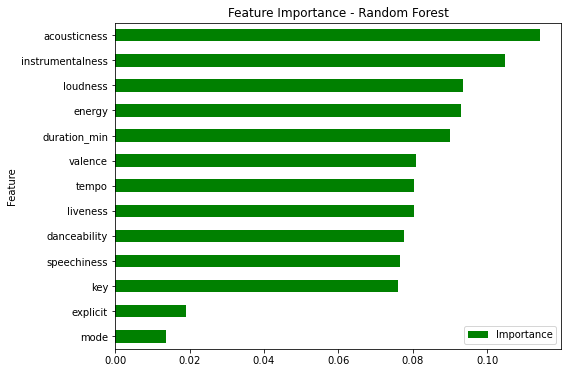

In [97]:
# Get feature importances
importances = rf_model.feature_importances_
features = x_train.columns

# Create a sorted bar plot
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=True).plot.barh(x='Feature', figsize=(8,6), color='green')
plt.title('Feature Importance - Random Forest')
plt.show()

<Figure size 432x288 with 0 Axes>

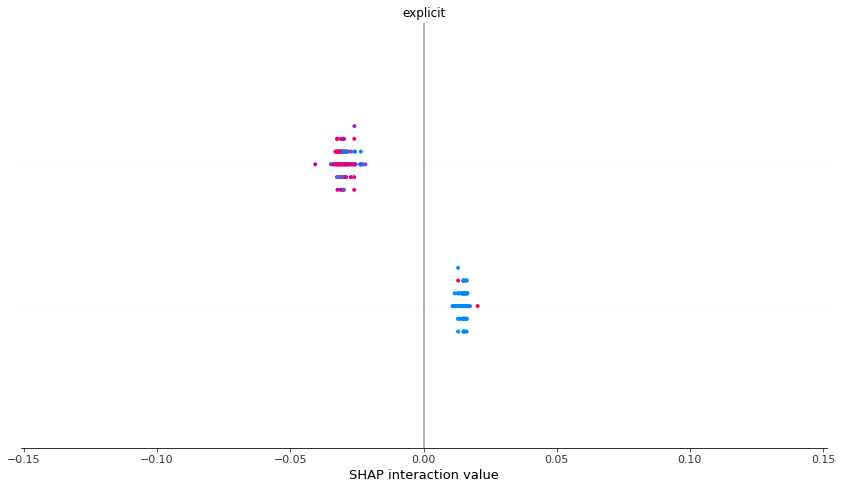

In [98]:
import shap

sample_x = x_train.sample(100, random_state=42)

# Create SHAP explainer for tree-based model
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(sample_x)

# Summary plot (global feature impact)
shap.summary_plot(shap_values, sample_x, plot_type='bar')

### Model Explainability Conclusion
Using Random Forest's built-in feature importances, we identified acousticness, instrumentalness, and energy as key contributors to the model’s decision-making when predicting whether a song would be a "hit." This is interesting, as some of these features exhibited weak linear correlation with is_hit, suggesting their influence may arise through non-linear or interactive effects.


Due to the computational intensity of SHAP on large datasets, we sampled 100 training records to approximate feature contributions. Within the 100 training records, it confirmed that features like explicit and loudness meaningfully impact predictions, with explicit tracks tending to increase the model’s likelihood of predicting a hit status. However, some features displayed overlapping SHAP values regardless of their actual value, indicating their influence may vary depending on context or feature interactions.

## Final Conclusion

This project explored what characteristics differentiate hit songs from non-hit tracks using a large Spotify dataset. After cleaning and engineering features, we trained and evaluated two classification models—Logistic Regression and Random Forest—on a highly imbalanced dataset, rebalanced using SMOTE.

The Random Forest model significantly outperformed Logistic Regression, achieving an AUC score of 0.92 on the test set, demonstrating strong discriminatory power. Feature importance analysis identified attributes like acousticness, instrumentalness, and energy as influential in the model’s decision-making—despite their weak linear correlation with hit status. This suggests the model may be capturing more subtle, non-linear interactions that are not obvious through correlation alone.

To further interpret the model's behavior, we used SHAP values on a subset of training data. This revealed that features like explicit content and loudness meaningfully impacted predictions in some samples. However, SHAP also showed variation across records—indicating that a song’s success may not depend on isolated audio features, but rather on the interaction between multiple traits and possibly external factors (e.g., artist fame, timing, or social trends).

Overall, this project demonstrates both the potential and limitations of using machine learning to understand musical success. While our models surfaced surprising patterns, they also highlight the complex and context-dependent nature of what makes a song a "hit." Predicting cultural phenomena remains a challenge—but model-based interpretation helps bring structure to the mystery.